In [1]:
from video import Video
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
v = Video("../../datasets/data/background/Video_008.avi")

v.read()
X = v.to_matrix()
U, s, Vt = v.compute_svd()

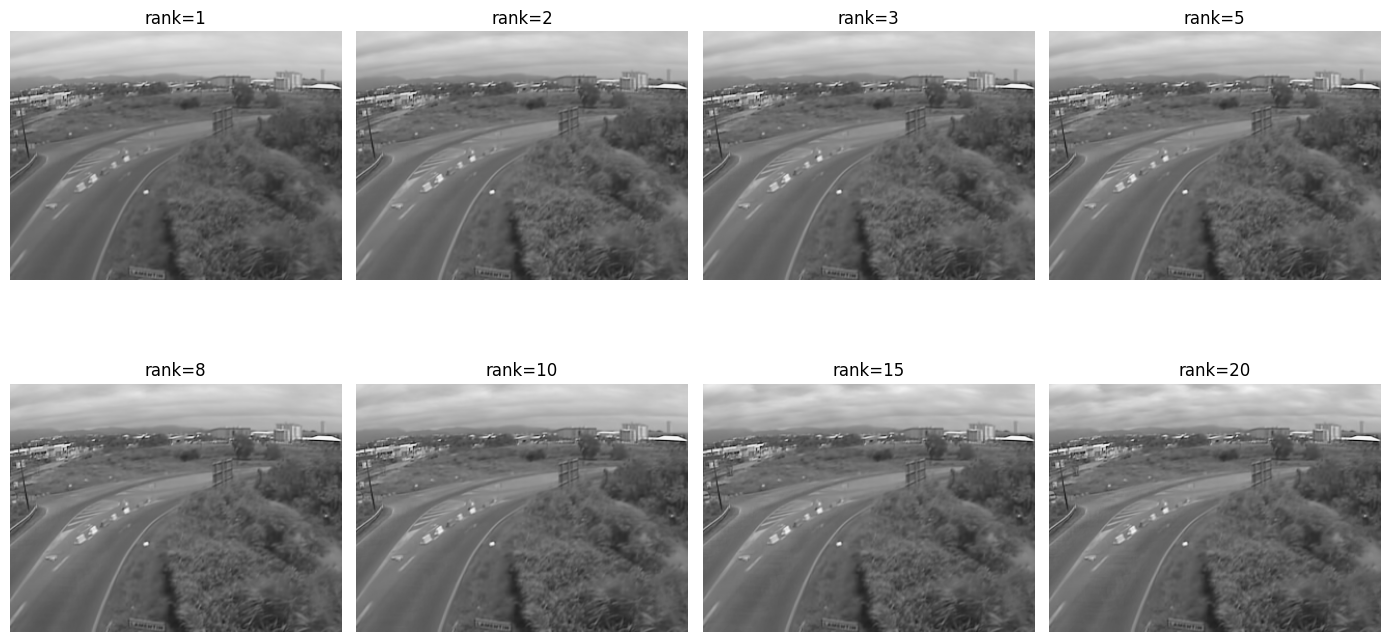

In [3]:
ranks = [1, 2, 3, 5, 8, 10, 15, 20]

plt.figure(figsize=(14, 8))
cols = 4
rows = (len(ranks) + cols - 1) // cols

for i, r in enumerate(ranks, 1):
    img = v.reconstruct_first_frame(rank=r, clip=True)
    ax = plt.subplot(rows, cols, i)
    ax.imshow(img, cmap="gray", vmin=0, vmax=1)
    ax.set_title(f"rank={r}")
    ax.axis("off")

plt.tight_layout()
plt.show()

В данном случае движущиеся объекты удаляются уже при r=1. По идее, при маленьком r фон может быть слишком размыт, а при слишком большом начнут появляться детали движущихся объектов, но я этого не вижу.

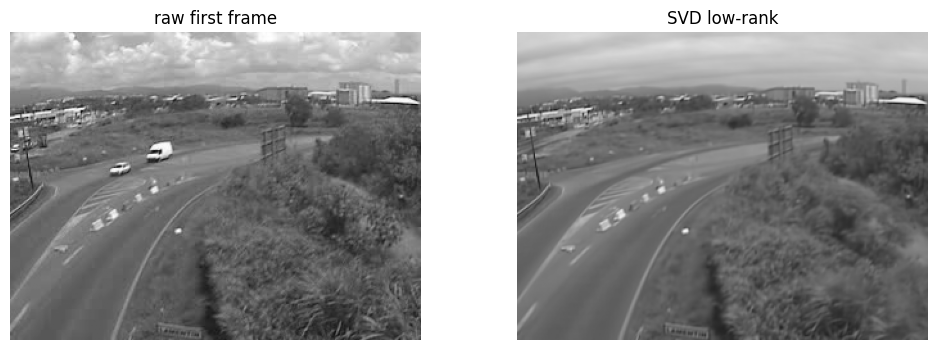

In [4]:
raw = v.first_frame_raw()                 
raw_gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)

approx = v.reconstruct_first_frame(rank=2)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.imshow(raw_gray, cmap="gray"); plt.title("raw first frame"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(approx, cmap="gray", vmin=0, vmax=1); plt.title("SVD low-rank"); plt.axis("off")
plt.show()